In [1]:
import sys
import gc
import glob
import re
from mne_bids import BIDSPath, read_raw_bids
from bids import BIDSLayout
import numpy as np
import mne
from autoreject import get_rejection_threshold, validation_curve

In [2]:
# Constants
sub = '10'
task = 'expectationsABR'
BIDS_ROOT = '../data/bids'
DERIV_ROOT = '../data/bids/derivatives'
LOWPASS = 2000
HIGHPASS = 100

print("---------- Import data ----------")
print(sub, task)
bids_path = BIDSPath(root = BIDS_ROOT,
                    subject = sub,
                    task = task,
                    datatype = 'eeg',
                    )
print(bids_path)
raw = read_raw_bids(bids_path, verbose = False)
raw.load_data()
raw = raw.pick_types(eeg = True)
events, event_ids = mne.events_from_annotations(raw)

print("---------- Filtering ----------")
raw = raw.filter(h_freq = LOWPASS, l_freq = HIGHPASS, picks = ['EP1'])
line_freqs = np.arange(60, 181, 60)
raw.notch_filter(line_freqs, picks = ['EP1'])

print("---------- Epoch ----------")
epochs = mne.Epochs(
    raw,
    events,
    tmin = -0.02,
    tmax = 0.02,
    baseline = None, # do NOT baseline correct the trials yet; we do that after ICA
    event_id = event_ids, # remember which epochs are associated with which condition
    preload = True # keep data in memory
)

---------- Import data ----------
10 expectationsABR
../data/bids/sub-10/eeg/sub-10_task-expectationsABR_eeg.vhdr
Reading 0 ... 61966249  =      0.000 ...  2478.650 secs...
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['New Segment/', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S  5', 'Stimulus/S  6', 'Stimulus/S  7', 'Stimulus/S  8', 'Stimulus/S  9', 'Stimulus/S 10', 'Stimulus/S 11', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S 14', 'Stimulus/S 15']
---------- Filtering ----------
Filtering a subset of channels. The highpass and lowpass values in the measurement info will not be updated.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1e+02 - 2e+03 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
-

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.6s finished


Filtering raw data in 1 contiguous segment
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 165001 samples (6.600 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.7s finished


---------- Epoch ----------
Not setting metadata
8818 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 8818 events and 1001 original time points ...
1 bad epochs dropped


In [13]:
epochs

Number of events,8817
Events,New Segment/: 0Stimulus/S 2: 699Stimulus/S 3: 699Stimulus/S 4: 698Stimulus/S 5: 700Stimulus/S 6: 700Stimulus/S 7: 700Stimulus/S 8: 699Stimulus/S 9: 700Stimulus/S 10: 700Stimulus/S 11: 700Stimulus/S 12: 700Stimulus/S 13: 700Stimulus/S 14: 211Stimulus/S 15: 211
Time range,-0.020 – 0.020 s
Baseline,off


NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
    Using multitaper spectrum estimation with 7 DPSS windows
Averaging across epochs...
Need more than one channel to make topography for eeg. Disabling interactivity.


/var/folders/bk/d0152l256wj91ds4hp514cj40000gn/T/ipykernel_14087/104666807.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  epochs['Stimulus/S  6'].plot_psd(picks = ['BIP1'], fmax = 450)
/Users/letitiaho/miniconda3/envs/pitch-tracking/lib/python3.10/site-packages/mne/viz/utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


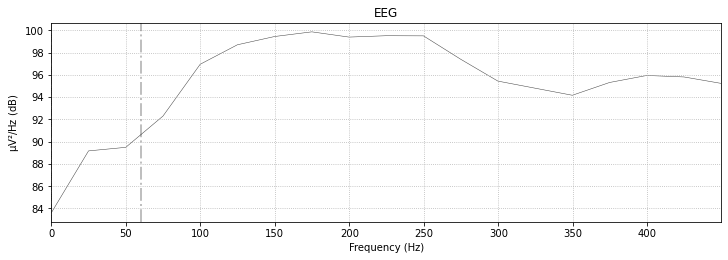

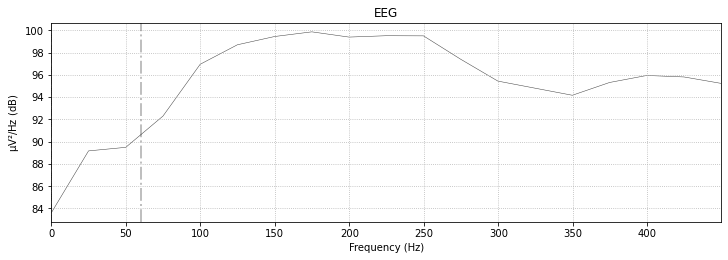

In [19]:
epochs['Stimulus/S  6'].plot_psd(picks = ['BIP1'], fmax = 450)